# The Deep Learning Pipeline – Tensorflow

### The seven step deep learning procedure:
1.  Data Preprocessing
2.  Model Creation – Keras Sequential
3.  Model Compiling – Loss, Optimizer, Metric
4.  Training Models and Cross-Validation
5.  Model Evaluation
6.  Making Predictions
7.  Save and Export Model

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings(action="ignore")
%matplotlib inline

In [2]:
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
y = digits.target

print(X.shape, y.shape)
print("Target Names", digits.target_names)

(1797, 64) (1797,)
Target Names [0 1 2 3 4 5 6 7 8 9]


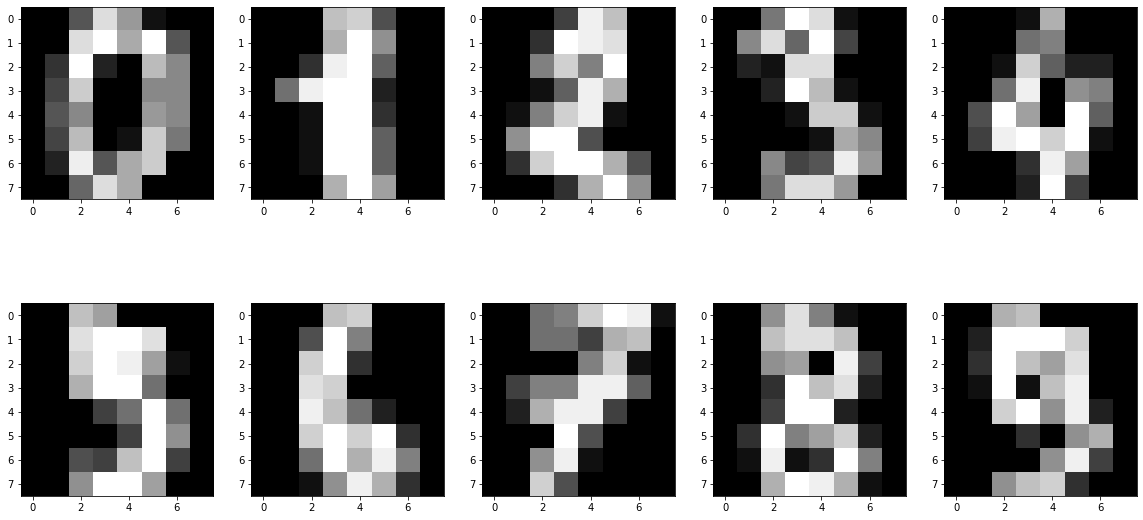

In [3]:
plt.figure(figsize=(20,10))
plt.gray()

for i in range(10):
    plt.subplot(2,5, i+1)
    plt.imshow(digits.images[i]) 
    
plt.show()

## Data Preprocessing

In [4]:
from sklearn.utils import shuffle
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split

In [5]:
## visualizing the data – first instance
print(X[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [6]:
transformer = Normalizer()
X = transformer.fit_transform(X)

print(X.shape)

(1797, 64)


In [7]:
## visualizing normalized data – first instance
print(X[0])

[0.         0.         0.09024036 0.23462493 0.16243265 0.01804807
 0.         0.         0.         0.         0.23462493 0.27072108
 0.18048072 0.27072108 0.09024036 0.         0.         0.05414422
 0.27072108 0.03609614 0.         0.19852879 0.14438458 0.
 0.         0.07219229 0.21657686 0.         0.         0.14438458
 0.14438458 0.         0.         0.09024036 0.14438458 0.
 0.         0.16243265 0.14438458 0.         0.         0.07219229
 0.19852879 0.         0.01804807 0.21657686 0.1263365  0.
 0.         0.03609614 0.25267301 0.09024036 0.18048072 0.21657686
 0.         0.         0.         0.         0.10828843 0.23462493
 0.18048072 0.         0.         0.        ]


In [77]:
from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=0)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1437, 64) (360, 64) (1437,) (360,)


## Model Creation

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.optimizers import Adam, SGD

In [10]:
model = Sequential([
    Dense(units=10, input_shape=(64,), activation='relu'),
    Dense(units=20, activation='relu'),
    Dense(units=10, activation='softmax')
])

## Model Training

In [11]:
model.compile(optimizer=SGD(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.fit(x=X_train, y=y_train, batch_size=20, epochs=100, verbose=2)

Epoch 1/100
72/72 - 0s - loss: 2.3015 - accuracy: 0.1058
Epoch 2/100
72/72 - 0s - loss: 2.2948 - accuracy: 0.1148
Epoch 3/100
72/72 - 0s - loss: 2.2890 - accuracy: 0.1169
Epoch 4/100
72/72 - 0s - loss: 2.2817 - accuracy: 0.1190
Epoch 5/100
72/72 - 0s - loss: 2.2732 - accuracy: 0.1385
Epoch 6/100
72/72 - 0s - loss: 2.2656 - accuracy: 0.1601
Epoch 7/100
72/72 - 0s - loss: 2.2587 - accuracy: 0.1761
Epoch 8/100
72/72 - 0s - loss: 2.2518 - accuracy: 0.2129
Epoch 9/100
72/72 - 0s - loss: 2.2443 - accuracy: 0.2192
Epoch 10/100
72/72 - 0s - loss: 2.2357 - accuracy: 0.2470
Epoch 11/100
72/72 - 0s - loss: 2.2258 - accuracy: 0.2728
Epoch 12/100
72/72 - 0s - loss: 2.2140 - accuracy: 0.2853
Epoch 13/100
72/72 - 0s - loss: 2.2009 - accuracy: 0.2992
Epoch 14/100
72/72 - 0s - loss: 2.1873 - accuracy: 0.3097
Epoch 15/100
72/72 - 0s - loss: 2.1733 - accuracy: 0.3305
Epoch 16/100
72/72 - 0s - loss: 2.1581 - accuracy: 0.3403
Epoch 17/100
72/72 - 0s - loss: 2.1420 - accuracy: 0.3577
Epoch 18/100
72/72 - 0s

In [13]:
model.fit(x=X, y=y, validation_split=0.1, batch_size=20, epochs=100, verbose=2)

Epoch 1/100
81/81 - 0s - loss: 0.3425 - accuracy: 0.9041 - val_loss: 0.3793 - val_accuracy: 0.9056
Epoch 2/100
81/81 - 0s - loss: 0.3374 - accuracy: 0.9079 - val_loss: 0.3699 - val_accuracy: 0.9167
Epoch 3/100
81/81 - 0s - loss: 0.3312 - accuracy: 0.9029 - val_loss: 0.3731 - val_accuracy: 0.9000
Epoch 4/100
81/81 - 0s - loss: 0.3261 - accuracy: 0.9072 - val_loss: 0.3614 - val_accuracy: 0.9167
Epoch 5/100
81/81 - 0s - loss: 0.3208 - accuracy: 0.9085 - val_loss: 0.3781 - val_accuracy: 0.9056
Epoch 6/100
81/81 - 0s - loss: 0.3160 - accuracy: 0.9103 - val_loss: 0.3603 - val_accuracy: 0.9056
Epoch 7/100
81/81 - 0s - loss: 0.3110 - accuracy: 0.9109 - val_loss: 0.3585 - val_accuracy: 0.9056
Epoch 8/100
81/81 - 0s - loss: 0.3058 - accuracy: 0.9147 - val_loss: 0.3552 - val_accuracy: 0.9056
Epoch 9/100
81/81 - 0s - loss: 0.3017 - accuracy: 0.9147 - val_loss: 0.3585 - val_accuracy: 0.9111
Epoch 10/100
81/81 - 0s - loss: 0.2978 - accuracy: 0.9215 - val_loss: 0.3510 - val_accuracy: 0.9056
Epoch 11/

In [14]:
model.evaluate(X_test, y_test)

12/12 [==============================] - 0s 2ms/step - loss: 0.1601 - accuracy: 0.9472


[0.16012658178806305, 0.9472222328186035]

In [15]:
predictions = model.predict(x=X_test, batch_size=10, verbose=0)

print(predictions[0])
print(predictions.argmax(axis=1))

[8.1340293e-04 2.8983638e-06 2.0953603e-06 4.3206401e-07 1.1267049e-06
 9.9847871e-01 4.9805371e-06 2.0464524e-04 4.7536747e-04 1.6377686e-05]
[5 2 5 5 5 3 2 2 3 5 9 8 7 2 1 1 5 7 0 4 5 9 0 2 1 3 4 7 5 2 1 1 2 9 8 1 4
 9 7 9 5 5 6 0 1 7 2 9 7 7 3 9 5 6 6 6 7 7 8 1 6 1 3 6 1 3 2 6 8 1 4 7 1 6
 0 0 5 1 2 8 1 6 4 0 4 7 5 7 8 3 7 8 5 1 1 7 5 9 7 9 3 0 7 8 7 4 8 3 2 8 5
 2 7 4 4 8 9 7 4 5 0 5 9 8 2 3 2 4 4 8 0 5 2 9 4 8 6 5 9 9 8 0 9 4 3 8 7 5
 5 3 5 5 4 0 8 7 2 8 4 1 0 0 3 6 4 7 7 5 4 9 2 8 7 9 7 2 0 3 3 8 5 7 5 6 8
 4 1 5 1 1 6 9 9 7 8 6 4 6 0 1 6 5 3 9 0 2 7 8 1 7 3 8 3 9 3 6 9 6 0 4 0 3
 5 0 4 3 5 8 8 9 2 5 0 8 3 7 4 3 7 9 2 6 1 2 1 7 0 7 5 0 6 4 1 8 3 0 8 9 2
 2 5 2 6 6 3 4 0 7 1 5 5 8 7 3 4 2 5 1 3 0 0 9 3 8 8 3 5 8 6 2 2 6 7 5 3 1
 5 7 5 4 5 2 6 2 0 6 0 4 2 5 8 8 7 1 4 7 2 0 0 3 7 4 2 5 2 6 9 0 5 7 2 9 1
 6 9 6 5 4 8 8 4 9 3 5 7 1 2 4 1 6 6 2 1 5 8 0 3 2 4 5]


In [17]:
#saving a tensorflow model
model.save("load-digits.h5")

In [19]:
from tensorflow.keras.models import load_model

#importing a saved tensorflow model
digits_model = load_model('load-digits.h5')

In [20]:
#using imported model to make predictions
predictions = digits_model.predict(x=X_test, batch_size=10, verbose=0)
print(predictions.argmax(axis=1))

[5 2 5 5 5 3 2 2 3 5 9 8 7 2 1 1 5 7 0 4 5 9 0 2 1 3 4 7 5 2 1 1 2 9 8 1 4
 9 7 9 5 5 6 0 1 7 2 9 7 7 3 9 5 6 6 6 7 7 8 1 6 1 3 6 1 3 2 6 8 1 4 7 1 6
 0 0 5 1 2 8 1 6 4 0 4 7 5 7 8 3 7 8 5 1 1 7 5 9 7 9 3 0 7 8 7 4 8 3 2 8 5
 2 7 4 4 8 9 7 4 5 0 5 9 8 2 3 2 4 4 8 0 5 2 9 4 8 6 5 9 9 8 0 9 4 3 8 7 5
 5 3 5 5 4 0 8 7 2 8 4 1 0 0 3 6 4 7 7 5 4 9 2 8 7 9 7 2 0 3 3 8 5 7 5 6 8
 4 1 5 1 1 6 9 9 7 8 6 4 6 0 1 6 5 3 9 0 2 7 8 1 7 3 8 3 9 3 6 9 6 0 4 0 3
 5 0 4 3 5 8 8 9 2 5 0 8 3 7 4 3 7 9 2 6 1 2 1 7 0 7 5 0 6 4 1 8 3 0 8 9 2
 2 5 2 6 6 3 4 0 7 1 5 5 8 7 3 4 2 5 1 3 0 0 9 3 8 8 3 5 8 6 2 2 6 7 5 3 1
 5 7 5 4 5 2 6 2 0 6 0 4 2 5 8 8 7 1 4 7 2 0 0 3 7 4 2 5 2 6 9 0 5 7 2 9 1
 6 9 6 5 4 8 8 4 9 3 5 7 1 2 4 1 6 6 2 1 5 8 0 3 2 4 5]
